# Interpolación

## Polinomio de interpolación de Lagrange

In [1]:
%matplotlib inline
import sys #importar libreria para trabajar con carpetas
sys.path.insert(1,'/Algortimos') # insertando carpeta para busqueda
from Algoritmos.lagrange import LagrangePol # importar el algoritmo
from Algoritmos.difdiv import NewtonPol # importar el algoritmo
from Algoritmos.tcubicos import CubicSplines # importar el algoritmo
from Algoritmos.graficas import * # importar el algoritmo

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
pd.set_option("display.precision", 10)
from math import *
from scipy.optimize import curve_fit

## Ejercicio 1
Encuentre el polinomio de interpolación de Lagrange que ajusta los siguientes puntos: $(-1,2)$, $(0,-1)$, $(1,1)$ y $(2,-2)$.

In [2]:
datos = [(-1,2),(0,-1),(1,1),(2,-2)]
Pol = LagrangePol(datos)

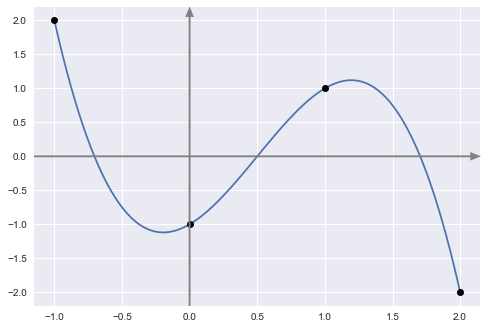

In [3]:
graficar_puntos([Pol],-1,2, datos)

In [4]:
coeficientes_pol(Pol, 4)

[-1.6666666666666665, 2.4999999999999982, 1.1666666666666679, -1.0]

## Ejercicio 2
Construir el interpolador de Lagrange para aproximar $f(8.4)$ si $f(8.0) = 1.25$, $f(8.2) = 1.76$, $f(8.3) = 1.46$, $f(8.5) = 1.75$

In [5]:
datos = [(8,1.25),(8.2,1.76),(8.3,1.46),(8.5,1.75)]
Pol = LagrangePol(datos)
Pol(8.4)

1.323333333333337

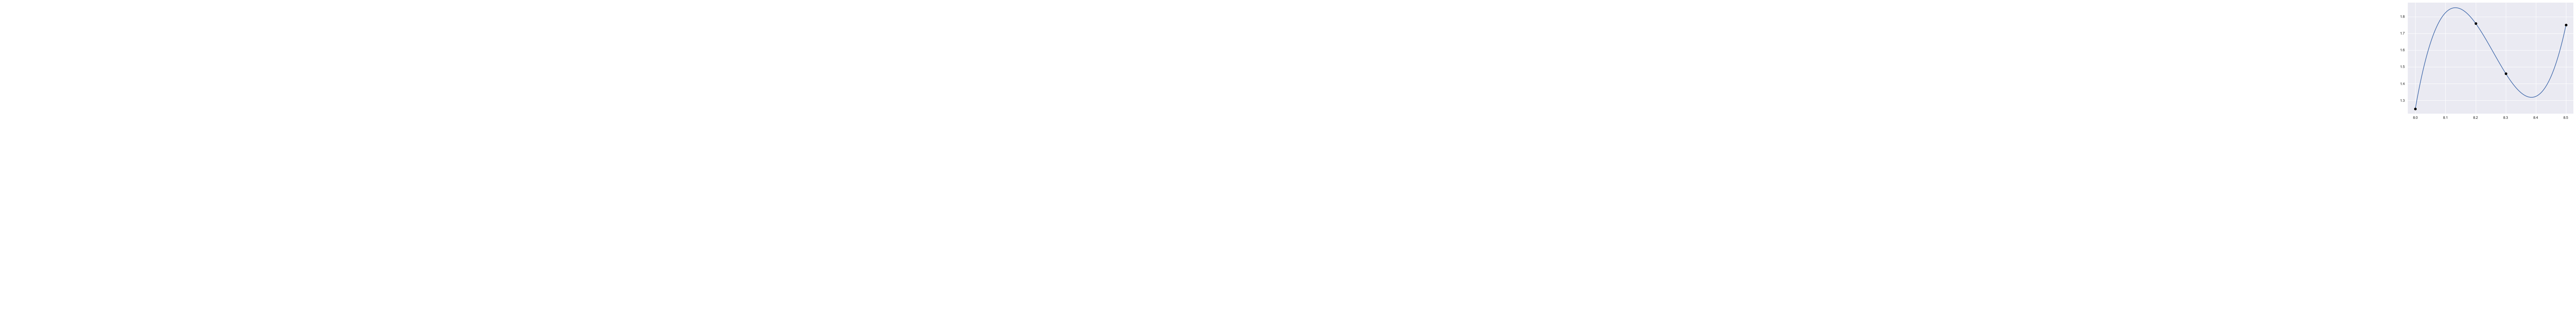

In [6]:
vector1 = [8,8.2,8.3,8.5]
vector2 = [1.25,1.76,1.46,1.75]
graficar_puntos([Pol],8,8.5,datos)
plt.show()

## Ejercicio 3
Si $f(x) =  \cos^{-1} (x)$, $x_0 = 0$, $x_1 = 0.5$, $x_2 = 0.8$ y $x_3 = 1$, utilice el interpolador de Lagrange para aproximar $f(0.65)$ y compare con el valor real

In [7]:
datos = [(0,np.arccos(0)),(0.5,np.arccos(0.5)),(0.8,np.arccos(0.8)),(1,np.arccos(1))]
Pol = LagrangePol(datos)
print(Pol(0.65),np.arccos(0.65))

0.903038902643403 0.863211890069541


In [8]:
coeficientes_pol(Pol, 4)

[-3.370629900892686,
 4.008747300142417,
 -2.2089137260446314,
 1.5707963267948966]

## Ejercicio 4

In [9]:
datos = [(0.5,-0.69314),(0.8,-0.22314),(1.2,0.18232),(1.4,0.33647),(1.6,0.47000),(1.8,0.58778),(2.0,0.69314)]
Pol = LagrangePol(datos)
coeficientes_pol(Pol, 7)

[-0.04806632410793199,
 0.4582267077048341,
 -1.8505577177386527,
 4.136617614619695,
 -5.670630486002224,
 5.330068585662723,
 -2.3555025641026184]

In [10]:
print(Pol(2.71828), Pol(1))

0.8972116369414351 0.00015581603581608927


In [11]:
## Polinomio de interpolación de Newton

In [12]:
from Algoritmos.difdiv import NewtonPol # importar el algoritmo

## Ejercicio 1
Encuentre el polinomio de interpolación de Newton que ajusta los siguientes puntos: $(-1,2)$, $(0,-1)$, $(1,1)$ y $(2,-2)$.

In [13]:
datos = [(-1,2),(0,-1),(1,1),(2,-2)]
tabla, P = NewtonPol(datos)

In [14]:
tabla

[[2, 0, 0, 0],
 [-1, -3.0, 0, 0],
 [1, 2.0, 2.5, 0],
 [-2, -3.0, -2.5, -1.6666666666666667]]

In [15]:
coeficientes_pol(P, 4)

[-1.6666666666666665, 2.4999999999999982, 1.1666666666666679, -1.0]

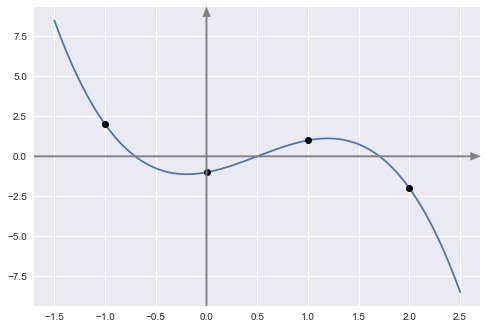

In [16]:
graficar_puntos([P],-1.5,2.5,datos)

## Ejercicio 4
Se tienen los siguientes datos:

$(0.5,-0.69314),(0.8,-0.22314),(1.2,0.18232),(1.4,0.33647),(1.6,0.47000),(1.8,0.58778),(2.0,0.69314)$

Utilice el interpolador de Newton para estimar la imagen de $x=2.71828$ y $x=1$.

In [17]:
datos = [(0.5,-0.69314),(0.8,-0.22314),(1.2,0.18232),(1.4,0.33647),(1.6,0.47000),(1.8,0.58778),(2.0,0.69314)]
tabla, P = NewtonPol(datos)

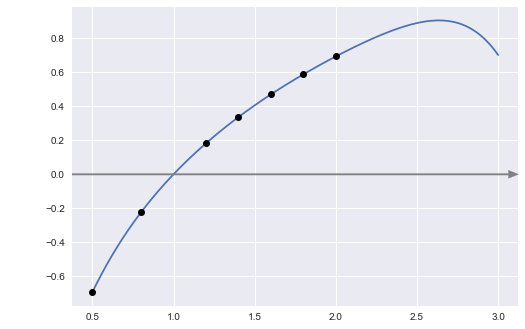

In [18]:
graficar_puntos([P],0.5,3,datos)

In [19]:
pd.DataFrame(tabla)

0             1             2             3             4  \
0 -0.69314  0.0000000000  0.0000000000  0.0000000000  0.0000000000   
1 -0.22314  1.5666666667  0.0000000000  0.0000000000  0.0000000000   
2  0.18232  1.0136500000 -0.7900238095  0.0000000000  0.0000000000   
3  0.33647  0.7707500000 -0.4048333333  0.4279894180  0.0000000000   
4  0.47000  0.6676500000 -0.2577500000  0.1838541667 -0.2219411376   
5  0.58778  0.5889000000 -0.1968750000  0.1014583333 -0.0823958333   
6  0.69314  0.5268000000 -0.1552500000  0.0693750000 -0.0401041667   

              5             6  
0  0.0000000000  0.0000000000  
1  0.0000000000  0.0000000000  
2  0.0000000000  0.0000000000  
3  0.0000000000  0.0000000000  
4  0.0000000000  0.0000000000  
5  0.1073425417  0.0000000000  
6  0.0352430556 -0.0480663241

In [20]:
coeficientes_pol(P, 7)

[-0.04806632410800504,
 0.45822670770598073,
 -1.850557717745538,
 4.136617614638908,
 -5.670630486026667,
 5.330068585673715,
 -2.355502564102597]

In [21]:
print(P(2.71828), P(1))

0.8972116369412869 0.00015581603581593662


# Trazadores

In [22]:
from scipy.interpolate import interp1d

Ajustar los siguientes datos con trazadores

In [23]:
datos = [(3,2.5), (4.5,1), (7, 2.5), (9,0.5)]
list_x = [dato[0] for dato in datos]
list_y = [dato[1] for dato in datos]
trazador_lineal = interp1d(list_x, list_y)
trazador_cuad = interp1d(list_x, list_y, kind='quadratic')
trazador_cubic = interp1d(list_x, list_y, kind='cubic')

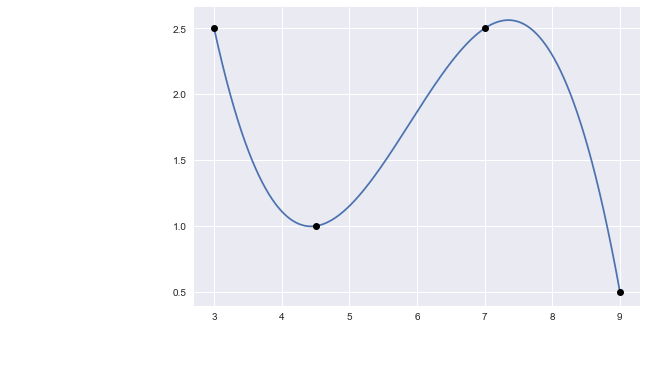

In [24]:
graficar_puntos([trazador_cubic],3,9,datos)

In [25]:
matrix_trazador_cubic = CubicSplines(datos)
coef_trazadores = np.array(matrix_trazador_cubic).T

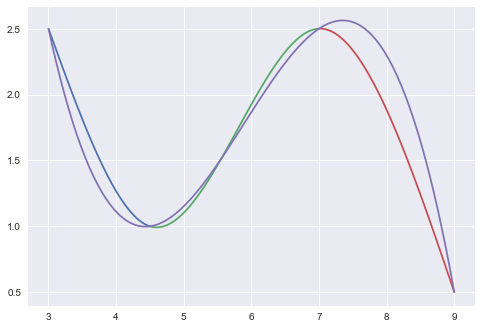

In [26]:
def func_cub(x, t, a, b, c, d):
    return a + b*(x - t) + c*(x - t)**2 +d*(x - t)**3
i = 0
fig, ax = plt.subplots()
for coef in coef_trazadores:
    x = np.linspace(list_x[i], list_x[i+1], 100, endpoint=True)
    ax.plot(x,func_cub(x, list_x[i], coef[0], coef[1], coef[2], coef[3]))
    i += 1
x = np.linspace(3,9, 100,endpoint=True)
plt.plot(x,trazador_cubic(x))    
plt.show()


In [27]:
# Utilizando el método de scipy.interpolate
datos = [(0.55, -0.69314), (0.8, -0.22314), (1.25, 0.18232), (1.4, 0.33647), (1.45, 0.47000), (1.85, 0.58778), (2.3, 0.69314)]
list_x = [dato[0] for dato in datos]
list_y = [dato[1] for dato in datos]
f_interp_lin = interp1d(list_x, list_y)
f_interp_cuad = interp1d(list_x, list_y,kind='quadratic')
f_interp_cubic = interp1d(list_x, list_y,kind='cubic')


In [28]:
matrix_interp_cubic_2 = CubicSplines(datos)
coef_trazadores = np.array(matrix_interp_cubic_2).T
coef_trazadores

array([[  -0.69314   ,    2.03590967,    0.        ,   -2.49455466],
       [  -0.22314   ,    1.56818067,   -1.87091599,    0.86298148],
       [   0.18232   ,    0.40861753,   -0.70589099,   32.21923504],
       [   0.33647   ,    2.3716486 ,   13.79276478, -156.27473359],
       [   0.47      ,    2.57886457,   -9.64844526,    9.84352208],
       [   0.58778   ,   -0.41500104,    2.16378124,   -1.60280092]])

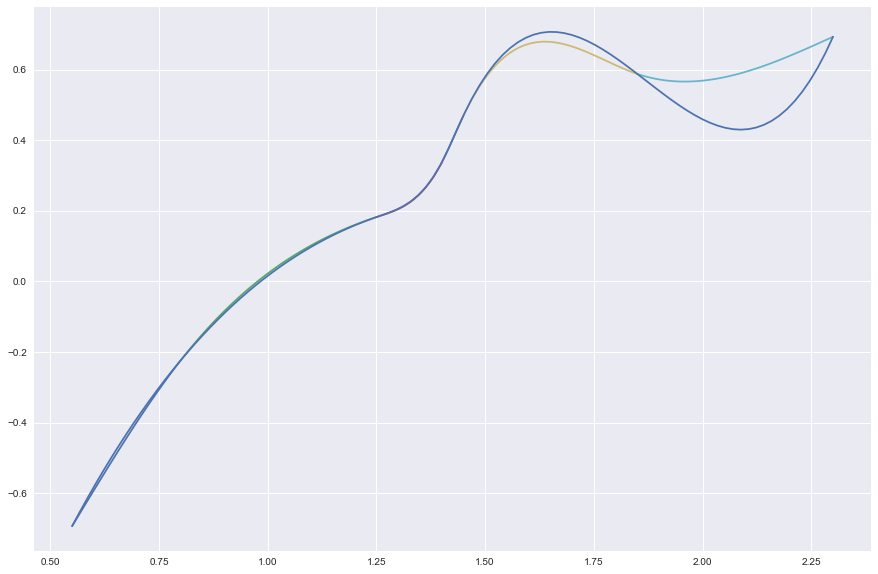

In [29]:
i = 0
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for coef in coef_trazadores:
    x = np.linspace(list_x[i], list_x[i+1], 100, endpoint=True)
    ax.plot(x,func_cub(x, list_x[i], coef[0], coef[1], coef[2], coef[3]))
    i += 1
x = np.linspace(0.55, 2.3, 100,endpoint=True)
plt.plot(x,f_interp_cubic(x))    
plt.show()

## Ajuste de curvas por mínimos cuadrados

-3276.9851006215313  +  650.9662562733419 x +  -12.61570407746012 x^2


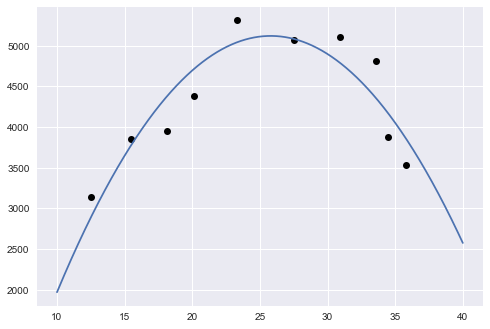

In [40]:
datos = [(23.3, 5311),(20.1,4382),(18.1,3950),(12.5,3137),(30.9,5113),
         (33.6,4814),(35.8,3540),(15.5,3850),(27.5,5071),(34.5,3881)]
datosx = [dato[0] for dato in datos]
datosy = [dato[1] for dato in datos]
def modelo(x,a_0,a_1,a_2):
    return a_0 + a_1*x + a_2*x**2
coef, matriz = curve_fit(modelo, datosx, datosy)
x = np.linspace(10, 40, 1000)
a_0,a_1,a_2 = coef
print(a_0,' + ',a_1,'x + ',a_2,'x^2')
fig, ax = plt.subplots()
ax.plot(datosx, datosy, 'ko')
ax.plot(x, modelo(x,a_0,a_1,a_2))

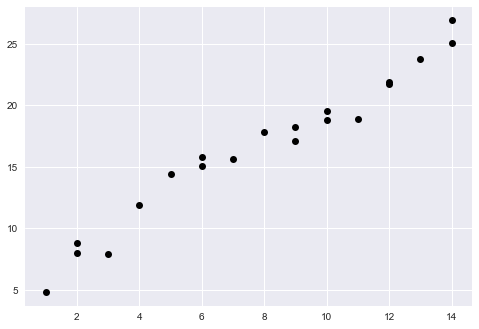

In [31]:
datos = [(1,4.8),(2,8.8),(2,8),(3,7.9),(4,11.9),
        (5,14.4),(6,15.1),(6,15.8),(7,15.6),(8,17.8),
        (9,18.2),(9,17.1),(10,18.8),(10,19.5),(11,18.9),
        (12,21.7),(12,21.9),(13,23.8),(14,26.9),(14,25.1)]
datosx = [dato[0] for dato in datos]
datosy = [dato[1] for dato in datos]
fig, ax = plt.subplots()
ax.plot(datosx, datosy, 'ko')

5.391061622940816 + 1.4188529591214154 x


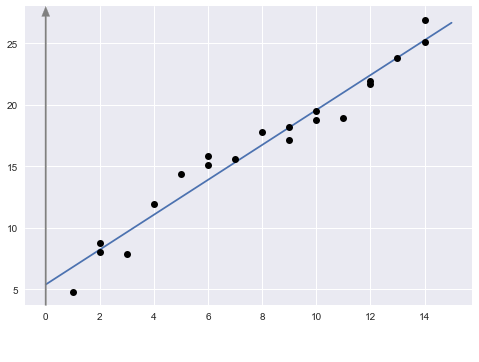

In [32]:
datosx = [dato[0] for dato in datos]
datosy = [dato[1] for dato in datos]
datosxy = [dato[0]*dato[1] for dato in datos]
datosxx = [dato[0]**2 for dato in datos]
a_0 = (sum(datosy)*sum(datosxx)-sum(datosxy)*sum(datosx))/(20*sum(datosxx)-sum(datosx)**2)
a_1 = (20*sum(datosxy)-sum(datosx)*sum(datosy))/(20*sum(datosxx)-sum(datosx)**2)
print(a_0,'+',a_1,'x')
def fun(x):
    return a_0 + a_1*x
graficar_puntos([fun],0,15,datos)

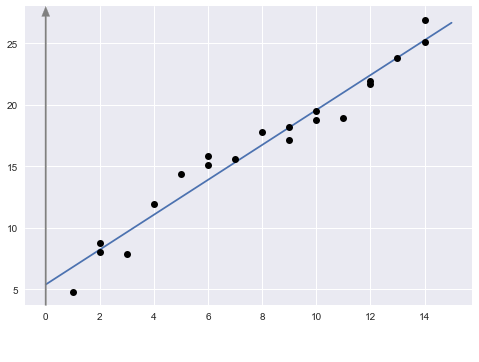

In [33]:
from Algoritmos.mincua import * 
f = RectaMinSq(datos)
graficar_puntos([f],0,15,datos)

In [34]:
from scipy.optimize import curve_fit

In [35]:
def modelo(x,a_0,a_1,a_2,a_3):
    return a_0 + a_1*x + a_2*x**2 + a_3*x**3
coef, matriz = curve_fit(modelo, datosx, datosy)
a_0,a_1,a_2,a_3 = coef
print(a_0,' + ',a_1,'x + ',a_2,'x^2 + ',a_3,'x^3')

0.9420614260330917  +  4.141654356213095 x +  -0.39939042091401705 x^2 +  0.01651671555260229 x^3


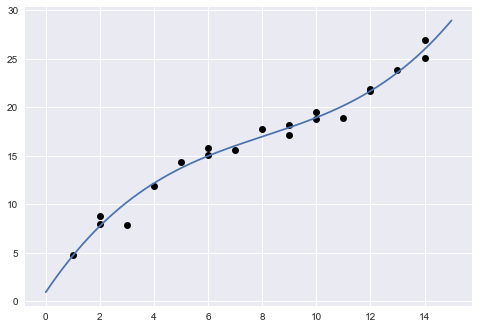

In [36]:
datosx = [dato[0] for dato in datos]
datosy = [dato[1] for dato in datos]
x = np.linspace(0, 15, 1000)
fig, ax = plt.subplots()
ax.plot(datosx, datosy, 'ko')
ax.plot(x, modelo(x,a_0,a_1,a_2,a_3))

In [ ]:
datos = [(23.3, 5311),(20.1,4382),(18.1,3950),(12.5,3137),(30.9,5113),
         (33.6,4814),(35.8,3540),(15.5,3850),(27.5,5071),(34.5,3881)]
datosx = [dato[0] for dato in datos]
datosy = [dato[1] for dato in datos]


In [ ]:
from Algoritmos.lagrange import LagrangePol
from scipy.interpolate import interp1d
Pol = LagrangePol(datos)
trazador_cubic = interp1d(datosx, datosy, kind='cubic')
def modelo(x,a_0,a_1,a_2):
    return a_0 + a_1*x + a_2*x**2
coef, matriz = curve_fit(modelo, datosx, datosy)
a_0,a_1,a_2 = coef
print(a_0,' + ',a_1,'x + ',a_2,'x^2')

In [ ]:
x = np.linspace(12.5, 40, 1000)
fig, ax = plt.subplots()
ax.plot(datosx, datosy, 'ko')
#ax.plot(x, Pol(x))
#ax.plot(x, trazador_cubic(x))
ax.plot(x, modelo(x,a_0,a_1,a_2))

In [ ]:
from math import *
datos = [(4, 1600),(8,1320),(12,1000),(16,890),(20,650),(24,560)]
datosx = [dato[0] for dato in datos]
datosy = [dato[1] for dato in datos]
def modelo(t, a_0, a_1):
    return a_0 * e**(-a_1*t)
coef, matriz = curve_fit(modelo, datosx, datosy)
a_0, a_1 = coef
x = np.linspace(0, 80, 1000)
fig, ax = plt.subplots()
ax.plot(datosx, datosy, 'ko')
ax.plot(x, modelo(x, a_0, a_1))

In [ ]:
print(a_0, 'e^(',-a_1,'t)')

In [ ]:
modelo(0, a_0, a_1)

In [ ]:
-(log(200/a_0))/(a_1)

In [54]:
from Algoritmos.lagrange import LagrangePol
from scipy.interpolate import interp1d
Pol = LagrangePol(datos)
trazador_cubic = interp1d(datosx, datosy, kind='cubic')
def modelo(x,a_0,a_1,a_2):
    return a_0 + a_1*x + a_2*x**2
coef, matriz = curve_fit(modelo, datosx, datosy)
a_0,a_1,a_2 = coef
print(a_0,' + ',a_1,'x + ',a_2,'x^2')

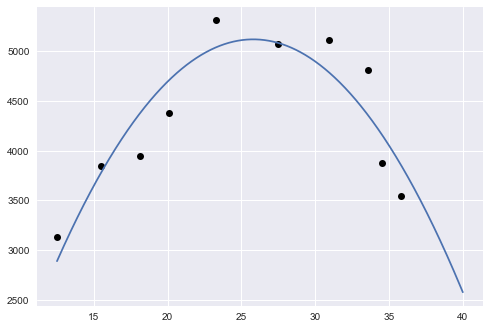

In [71]:
x = np.linspace(12.5, 40, 1000)
fig, ax = plt.subplots()
ax.plot(datosx, datosy, 'ko')
#ax.plot(x, Pol(x))
#ax.plot(x, trazador_cubic(x))
ax.plot(x, modelo(x,a_0,a_1,a_2))

<ipython-input-94-6d330dd0e0ec>:6: RuntimeWarning: overflow encountered in power
  return a_0 * e**(-a_1*t)


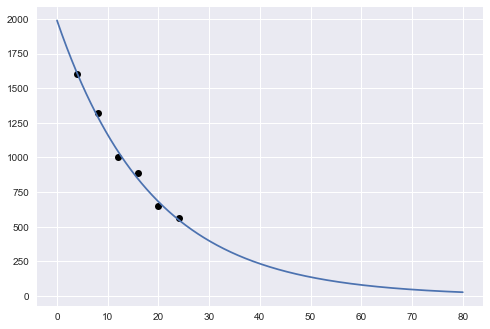

In [94]:
from math import *
datos = [(4, 1600),(8,1320),(12,1000),(16,890),(20,650),(24,560)]
datosx = [dato[0] for dato in datos]
datosy = [dato[1] for dato in datos]
def modelo(t, a_0, a_1):
    return a_0 * e**(-a_1*t)
coef, matriz = curve_fit(modelo, datosx, datosy)
a_0, a_1 = coef
x = np.linspace(0, 80, 1000)
fig, ax = plt.subplots()
ax.plot(datosx, datosy, 'ko')
ax.plot(x, modelo(x, a_0, a_1))

In [96]:
print(a_0, 'e^(',-a_1,'t)')

1989.2764720162338 e^( -0.053616762097598844 t)


In [98]:
modelo(0, a_0, a_1)

1989.2764720162338

In [99]:
-(log(200/a_0))/(a_1)

42.844976333624295